In [204]:
# imports and setup 
import pandas as pd
import scipy as sc
import numpy as np
import seaborn as sns

#%matplotlib notebook
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline  

In [205]:
storm_19 = pd.read_csv("./data/StormEvents_details-ftp_v1.0_d2019_c20200317.csv")
storm_18 = pd.read_csv("./data/StormEvents_details-ftp_v1.0_d2018_c20200317.csv")
storm_17 = pd.read_csv("./data/StormEvents_details-ftp_v1.0_d2017_c20200121.csv")
storm_16 = pd.read_csv("./data/StormEvents_details-ftp_v1.0_d2016_c20190817.csv")
storm_15 = pd.read_csv("./data/StormEvents_details-ftp_v1.0_d2015_c20191116.csv")


In [206]:
storms = storm_19.append(storm_18).append(storm_17).append(storm_16).append(storm_15)

In [207]:
storms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300829 entries, 0 to 57787
Data columns (total 51 columns):
BEGIN_YEARMONTH       300829 non-null int64
BEGIN_DAY             300829 non-null int64
BEGIN_TIME            300829 non-null int64
END_YEARMONTH         300829 non-null int64
END_DAY               300829 non-null int64
END_TIME              300829 non-null int64
EPISODE_ID            300829 non-null int64
EVENT_ID              300829 non-null int64
STATE                 300829 non-null object
STATE_FIPS            300829 non-null int64
YEAR                  300829 non-null int64
MONTH_NAME            300829 non-null object
EVENT_TYPE            300829 non-null object
CZ_TYPE               300829 non-null object
CZ_FIPS               300829 non-null int64
CZ_NAME               300829 non-null object
WFO                   300829 non-null object
BEGIN_DATE_TIME       300829 non-null object
CZ_TIMEZONE           300829 non-null object
END_DATE_TIME         300829 non-null object
I

In [208]:
storms['BEGIN_DATE_TIME'] = pd.to_datetime(storms['BEGIN_DATE_TIME'])
storms['END_DATE_TIME'] = pd.to_datetime(storms['END_DATE_TIME'])

In [209]:
# df.Val = (df.Val.replace(r'[KM]+$', '', regex=True).astype(float) * \ df.Val.str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))

In [210]:
storms = storms.drop(['EPISODE_ID','BEGIN_YEARMONTH', 'BEGIN_DAY', 'BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'STATE_FIPS', 'YEAR', 'MONTH_NAME', 'CZ_FIPS', 'CZ_TIMEZONE', 'SOURCE', 'CATEGORY', 'EPISODE_NARRATIVE', 'EVENT_NARRATIVE', 'BEGIN_AZIMUTH', 'END_AZIMUTH', 'BEGIN_RANGE', 'END_RANGE', 'DATA_SOURCE'], axis = 1)

In [211]:
storms.to_csv('storms_clean_data.csv', index=False)

In [260]:
storms = pd.read_csv("./storms_clean_data.csv")

In [213]:
storms.head()

EVENT_ID      STATE         EVENT_TYPE CZ_TYPE     CZ_NAME  WFO  \
0    824116      TEXAS        Flash Flood       C       BEXAR  EWX   
1    843354  MINNESOTA  Thunderstorm Wind       C        PINE  DLH   
2    861581      TEXAS  Thunderstorm Wind       C   VAN ZANDT  FWD   
3    861584      TEXAS  Thunderstorm Wind       C     TARRANT  FWD   
4    861582      TEXAS  Thunderstorm Wind       C  PALO PINTO  FWD   

       BEGIN_DATE_TIME        END_DATE_TIME  INJURIES_DIRECT  \
0  2019-05-09 15:54:00  2019-05-09 18:30:00                0   
1  2019-07-15 16:40:00  2019-07-15 16:41:00                0   
2  2019-10-20 22:23:00  2019-10-20 22:23:00                0   
3  2019-10-20 23:12:00  2019-10-20 23:12:00                0   
4  2019-10-20 22:36:00  2019-10-20 22:36:00                0   

   INJURIES_INDIRECT  ...  TOR_OTHER_WFO  TOR_OTHER_CZ_STATE  \
0                  0  ...            NaN                 NaN   
1                  0  ...            NaN                 NaN   
2                  0  ...            NaN                 NaN   
3                  0  ...            NaN                 NaN   
4                  0  ...            NaN                 NaN   

  TOR_OTHER_CZ_FIPS TOR_OTHER_CZ_NAME  BEGIN_LOCATION   END_LOCATION  \
0               NaN               NaN       LEON SPGS   SAN GERONIMO   
1               NaN               NaN      ROCK CREEK     ROCK CREEK   
2               NaN               NaN        EDGEWOOD       EDGEWOOD   
3               NaN               NaN            AZLE           AZLE   
4               NaN               NaN   MINERAL WELLS  MINERAL WELLS   

  BEGIN_LAT BEGIN_LON  END_LAT  END_LON  
0   29.7898  -98.6406  29.7158 -98.7744  
1   45.7700  -92.8700  45.7700 -92.8700  
2   32.7100  -95.8800  32.7100 -95.8800  
3   32.8700  -97.6100  32.8700 -97.6100  
4   32.8000  -98.1000  32.8000 -98.1000  

[5 rows x 30 columns]

In [214]:
storms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300829 entries, 0 to 300828
Data columns (total 30 columns):
EVENT_ID              300829 non-null int64
STATE                 300829 non-null object
EVENT_TYPE            300829 non-null object
CZ_TYPE               300829 non-null object
CZ_NAME               300829 non-null object
WFO                   300829 non-null object
BEGIN_DATE_TIME       300829 non-null object
END_DATE_TIME         300829 non-null object
INJURIES_DIRECT       300829 non-null int64
INJURIES_INDIRECT     300829 non-null int64
DEATHS_DIRECT         300829 non-null int64
DEATHS_INDIRECT       300829 non-null int64
DAMAGE_PROPERTY       243009 non-null object
DAMAGE_CROPS          243800 non-null object
MAGNITUDE             157847 non-null float64
MAGNITUDE_TYPE        111630 non-null object
FLOOD_CAUSE           37903 non-null object
TOR_F_SCALE           7023 non-null object
TOR_LENGTH            7023 non-null float64
TOR_WIDTH             7023 non-null float6

In [255]:
storms[storms['DAMAGE_PROPERTY'].isnull()].EVENT_TYPE.unique()

array(['Winter Weather', 'Drought', 'Winter Storm', 'Thunderstorm Wind',
       'Tornado', 'Hail', 'Marine Thunderstorm Wind', 'Heavy Rain',
       'High Wind', 'Marine Hail', 'Strong Wind', 'Cold/Wind Chill',
       'Extreme Cold/Wind Chill', 'Dense Fog', 'Heavy Snow',
       'Funnel Cloud', 'Frost/Freeze', 'Blizzard', 'Ice Storm',
       'Coastal Flood', 'Waterspout', 'Avalanche', 'Rip Current',
       'Lightning', 'Excessive Heat', 'Heat', 'Dust Devil', 'Wildfire',
       'Tropical Storm', 'Storm Surge/Tide', 'Tropical Depression',
       'Astronomical Low Tide', 'Lakeshore Flood', 'High Surf',
       'Marine High Wind', 'Lake-Effect Snow', 'Marine Strong Wind',
       'Dust Storm', 'Hurricane', 'Marine Tropical Storm', 'Sleet',
       'Freezing Fog', 'Marine Hurricane/Typhoon',
       'Marine Tropical Depression', 'Hurricane (Typhoon)',
       'Marine Dense Fog', 'Seiche'], dtype=object)

In [261]:
# Removing rows where both Damage Property and Damange Crop are not present.

storms = storms[(~storms['DAMAGE_PROPERTY'].isnull()) & (~storms['DAMAGE_CROPS'].isnull())]


In [262]:
storms.DAMAGE_PROPERTY = (storms.DAMAGE_PROPERTY.replace(r'[KMB]+$', '', regex=True).astype(float) * storms.DAMAGE_PROPERTY.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M','B'], [10**3, 10**6, 10**9]).astype(int)).astype(int)

In [264]:
storms.DAMAGE_CROPS = (storms.DAMAGE_CROPS.replace(r'[KMB]+$', '', regex=True).astype(float) * storms.DAMAGE_CROPS.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M','B'], [10**3, 10**6, 10**9]).astype(int)).astype(int)

In [266]:
storms["TOTAL_DAMAGE"] = storms["DAMAGE_PROPERTY"] + storms["DAMAGE_CROPS"]
storms["TOTAL_DEATHS"] = storms["DEATHS_DIRECT"] + storms["DEATHS_INDIRECT"]
storms["TOTAL_INJURIES"] = storms["INJURIES_DIRECT"] + storms["INJURIES_INDIRECT"]

In [269]:
storms = storms.drop(["DAMAGE_PROPERTY","DAMAGE_CROPS"], axis = 1)
storms = storms.drop(["DEATHS_DIRECT","DEATHS_INDIRECT"], axis = 1)
storms = storms.drop(["INJURIES_DIRECT","INJURIES_INDIRECT"], axis = 1)

In [276]:
storms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236813 entries, 0 to 300828
Data columns (total 27 columns):
EVENT_ID              236813 non-null int64
STATE                 236813 non-null object
EVENT_TYPE            236813 non-null object
CZ_TYPE               236813 non-null object
CZ_NAME               236813 non-null object
WFO                   236813 non-null object
BEGIN_DATE_TIME       236813 non-null object
END_DATE_TIME         236813 non-null object
MAGNITUDE             117776 non-null float64
MAGNITUDE_TYPE        84756 non-null object
FLOOD_CAUSE           37903 non-null object
TOR_F_SCALE           5573 non-null object
TOR_LENGTH            5573 non-null float64
TOR_WIDTH             5573 non-null float64
TOR_OTHER_WFO         657 non-null object
TOR_OTHER_CZ_STATE    657 non-null object
TOR_OTHER_CZ_FIPS     657 non-null float64
TOR_OTHER_CZ_NAME     657 non-null object
BEGIN_LOCATION        154185 non-null object
END_LOCATION          154185 non-null object
BEGIN_

In [277]:
# pd.DataFrame(storms[storms.END_LAT.isnull()].CZ_NAME.unique())

Text(0.5, 1, 'Correlation matrix')

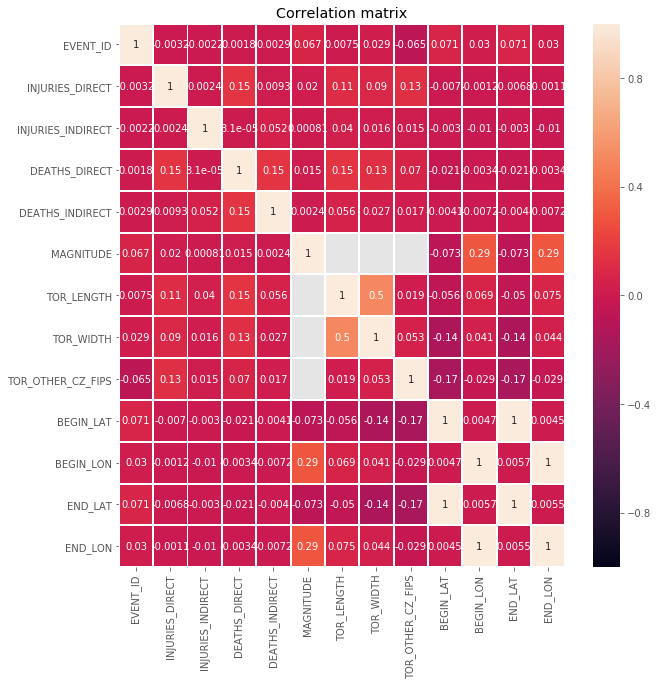

In [118]:
cmat = storms.corr()
plt.figure(figsize = (10,10))
ax = sns.heatmap(cmat, vmin=-1, vmax=1, annot=True, linewidths = 1)

plt.title("Correlation matrix")

In [119]:
cmat

EVENT_ID  INJURIES_DIRECT  INJURIES_INDIRECT  \
EVENT_ID           1.000000        -0.003153          -0.002185   
INJURIES_DIRECT   -0.003153         1.000000           0.002420   
INJURIES_INDIRECT -0.002185         0.002420           1.000000   
DEATHS_DIRECT      0.001835         0.150988           0.000031   
DEATHS_INDIRECT    0.002939         0.009302           0.051624   
MAGNITUDE          0.067260         0.019719           0.000807   
TOR_LENGTH         0.007496         0.112158           0.039846   
TOR_WIDTH          0.028983         0.089669           0.016222   
TOR_OTHER_CZ_FIPS -0.065003         0.125049           0.015251   
BEGIN_LAT          0.071134        -0.006995          -0.003032   
BEGIN_LON          0.029618        -0.001239          -0.010233   
END_LAT            0.071047        -0.006845          -0.003019   
END_LON            0.029709        -0.001128          -0.010232   

                   DEATHS_DIRECT  DEATHS_INDIRECT  MAGNITUDE  TOR_LENGTH  \
EVENT_ID                0.001835         0.002939   0.067260    0.007496   
INJURIES_DIRECT         0.150988         0.009302   0.019719    0.112158   
INJURIES_INDIRECT       0.000031         0.051624   0.000807    0.039846   
DEATHS_DIRECT           1.000000         0.149555   0.015488    0.149190   
DEATHS_INDIRECT         0.149555         1.000000   0.002362    0.056047   
MAGNITUDE               0.015488         0.002362   1.000000         NaN   
TOR_LENGTH              0.149190         0.056047        NaN    1.000000   
TOR_WIDTH               0.125530         0.026579        NaN    0.500805   
TOR_OTHER_CZ_FIPS       0.070122         0.017042        NaN    0.019029   
BEGIN_LAT              -0.021175        -0.004052  -0.072903   -0.055841   
BEGIN_LON              -0.003434        -0.007203   0.291932    0.069127   
END_LAT                -0.021109        -0.004048  -0.072937   -0.050354   
END_LON                -0.003419        -0.007190   0.292111    0.075361   

                   TOR_WIDTH  TOR_OTHER_CZ_FIPS  BEGIN_LAT  BEGIN_LON  \
EVENT_ID            0.028983          -0.065003   0.071134   0.029618   
INJURIES_DIRECT     0.089669           0.125049  -0.006995  -0.001239   
INJURIES_INDIRECT   0.016222           0.015251  -0.003032  -0.010233   
DEATHS_DIRECT       0.125530           0.070122  -0.021175  -0.003434   
DEATHS_INDIRECT     0.026579           0.017042  -0.004052  -0.007203   
MAGNITUDE                NaN                NaN  -0.072903   0.291932   
TOR_LENGTH          0.500805           0.019029  -0.055841   0.069127   
TOR_WIDTH           1.000000           0.052913  -0.144759   0.040912   
TOR_OTHER_CZ_FIPS   0.052913           1.000000  -0.171209  -0.028600   
BEGIN_LAT          -0.144759          -0.171209   1.000000   0.004666   
BEGIN_LON           0.040912          -0.028600   0.004666   1.000000   
END_LAT            -0.142016          -0.170857   0.999962   0.005686   
END_LON             0.043984          -0.028614   0.004500   0.999987   

                    END_LAT   END_LON  
EVENT_ID           0.071047  0.029709  
INJURIES_DIRECT   -0.006845 -0.001128  
INJURIES_INDIRECT -0.003019 -0.010232  
DEATHS_DIRECT     -0.021109 -0.003419  
DEATHS_INDIRECT   -0.004048 -0.007190  
MAGNITUDE         -0.072937  0.292111  
TOR_LENGTH        -0.050354  0.075361  
TOR_WIDTH         -0.142016  0.043984  
TOR_OTHER_CZ_FIPS -0.170857 -0.028614  
BEGIN_LAT          0.999962  0.004500  
BEGIN_LON          0.005686  0.999987  
END_LAT            1.000000  0.005520  
END_LON            0.005520  1.000000